In [8]:
# Import libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers


## Import dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_val, y_train_val), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_val.shape

(60000, 28, 28)

## Preprocessing


In [14]:
X_val, X_train = X_train_val[:5000] / 255, X_train_val[5000:] / 255

y_val, y_train = y_train_val[:5000], y_train_val[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[1]]
y_train[1]

0

## Create model


In [10]:
model = keras.Sequential([
    layers.Flatten(input_shape = [28, 28]),
    layers.Dense(units = 300, activation = 'relu'),
    layers.Dense(units = 100, activation = 'relu'),
    layers.Dense(units = 10, activation = 'softmax')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [15]:
history = model.fit(
    X_train,
    y_train,
    validation_data = (X_val, y_val),
    epochs = 35
)

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7251 - accuracy: 0.7625 - val_loss: 0.5166 - val_accuracy: 0.8338
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4892 - accuracy: 0.8296 - val_loss: 0.4511 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4426 - accuracy: 0.8443 - val_loss: 0.4694 - val_accuracy: 0.8338
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4171 - accuracy: 0.8539 - val_loss: 0.4115 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3969 - accuracy: 0.8611 - val_loss: 0.3826 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3810 - accuracy: 0.8673 - val_loss: 0.3759 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3680 - accuracy: 0.8700 - val_loss: 0.3744 - val_ac

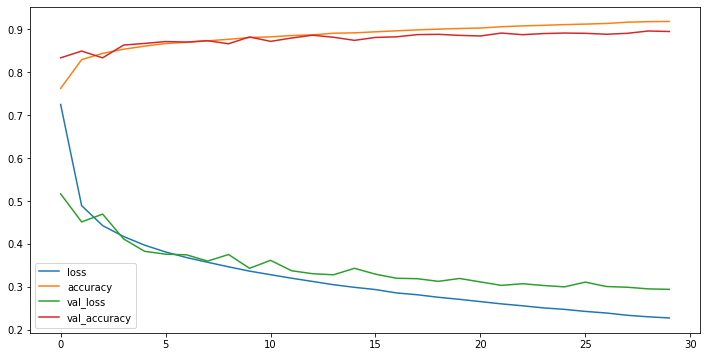

In [17]:
df_history = pd.DataFrame(history.history).plot(figsize = (12, 6))

### Model evaluation


In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 57.8139 - accuracy: 0.8602


[57.81393051147461, 0.8601999878883362]

### Prediction

In [20]:
X_check = X_test[:4]
prediction = model.predict(X_check)
prediction.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
model.predict_classes(X_check)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, 1])